# Import 

In [1]:
import jax.numpy as jnp
import jax.random as jrandom

In [2]:
import json

import jax.numpy as jnp
import catalax as ctx
import catalax.neural as ctn

C:\Users\danic\anaconda3\envs\enzyme\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import matplotlib.pyplot as plt

In [4]:
import json

import jax.numpy as jnp
import catalax as ctx
import catalax.neural as ctn

In [5]:
from tqdm import tqdm
import time


In [6]:
from catalax import Model
from catalax.neural import NeuralODE, train_neural_ode


In [7]:
import numpy as np

In [10]:
import numpy as np
model = Model.load("C:/Users/danic/OneDrive/Desktop/Masters Thesis/model_pgm.json")
times = jnp.load("C:/Users/danic/OneDrive/Desktop/Masters Thesis/Kyle time arrays/time.npy", allow_pickle=True)
data = jnp.load("C:/Users/danic/OneDrive/Desktop/Masters Thesis/Kyle time arrays/data_kyle.npy", allow_pickle=True)
y0s = jnp.load("C:/Users/danic/OneDrive/Desktop/Masters Thesis/Kyle time arrays/final_initials.npy",allow_pickle=True)

 


In [11]:
print(times.shape, data.shape, y0s.shape)

# Handle PRNG keys
key = jrandom.PRNGKey(420)
data_key, model_key, loader_key = jrandom.split(key, 3)

(13, 39) (13, 39, 3) (13, 3)


In [12]:
# Create a neural ODE model
neural_ode = NeuralODE.from_model(model, width_size=32, depth=2, key=model_key)

# NEURAL ODE

In [11]:
neural_ode

NeuralODE(
  func=MLP(
    mlp=MLP(
      layers=(
        Linear(
          weight=f32[32,3],
          bias=f32[32],
          in_features=3,
          out_features=32,
          use_bias=True
        ),
        Linear(
          weight=f32[32,32],
          bias=f32[32],
          in_features=32,
          out_features=32,
          use_bias=True
        ),
        Linear(
          weight=f32[3,32],
          bias=f32[3],
          in_features=32,
          out_features=3,
          use_bias=True
        )
      ),
      activation=<wrapped function softplus>,
      final_activation=<function <lambda>>,
      use_bias=True,
      use_final_bias=True,
      in_size=3,
      out_size=3,
      width_size=32,
      depth=2
    )
  ),
  observable_indices=[0, 1, 2],
  hyperparams={
    'data_size':
    3,
    'width_size':
    32,
    'depth':
    2,
    'model':
    {
      'name':
      'model',
      'species':
      [
        {'name': 'p3ga', 'symbol': s0},
        {'name': 'p2ga', 

In [20]:
# Train neural ODE
trained = train_neural_ode(
    model=neural_ode,
    data=data,
    times=times,
    inital_conditions=y0s,
    batch_size=5,
    steps_strategy=(1000, 5000,10000,100000),
    lr_strategy=(3e-3, 3e-4,3e-5,3e-6),
    length_strategy=(0.1, 0.5,0.75,1),
    log="log.log",
    save_milestones=False,
)

<< Strategy #1: Learning rate: 0.003 | Steps: 1000 Length: 10.0% >>



MSE: 379.1400 MAE: 13.0326: : 1100it [00:40, 27.02it/s]                                                                




<< Strategy #2: Learning rate: 0.0003 | Steps: 5000 Length: 50.0% >>



MSE: 11413.7031 MAE: 65.5161: : 5100it [11:34,  7.34it/s]                                                              




<< Strategy #3: Learning rate: 3e-05 | Steps: 10000 Length: 75.0% >>



MSE: 22702.5352 MAE: 94.3280: : 10100it [22:17,  7.55it/s]                                                             




<< Strategy #4: Learning rate: 3e-06 | Steps: 100000 Length: 100% >>



MSE: 36104.5391 MAE: 120.5975: : 100100it [5:19:46,  5.22it/s]                                                         

In [22]:
#save
trained.save_to_eqx("C:/Users/danic/OneDrive/Desktop/Masters Thesis/trained.eqx",'Trained_2024_March_100k_Steps_3e6_Length')


# Load Data

In [15]:
# Initialize the model
model = model = Model.load("C:/Users/danic/OneDrive/Desktop/Masters Thesis/model_pgm.json")


In [16]:
print(f"times: {times.shape} | Data: {data.shape} | Initial Conditions: {y0s.shape}")

times: (13, 39) | Data: (13, 39, 3) | Initial Conditions: (13, 3)


In [17]:
model = Model.load("C:/Users/danic/OneDrive/Desktop/Masters Thesis/model_pgm.json")
model

Model summary


Eq(x, Matrix([[s0, s1, s2]]))

Eq(theta, Matrix([[vf_pgm, k_p3ga_pgm, keq_pgm, k_p2ga_pgm, keq_eno, k_PEP_eno, vf_eno, k_p2ga_eno]]))

Eq(Derivative(p3ga, t), vf_pgm*(s0 - s1/keq_pgm)/(k_p2ga_pgm*(1 + s1/k_p3ga_pgm + s0/k_p2ga_pgm)))

Eq(Derivative(p2ga, t), vf_pgm*(s1 - s0/keq_pgm)/(k_p3ga_pgm*(1 + s1/k_p3ga_pgm + s0/k_p2ga_pgm)))

Eq(Derivative(PEP, t), s1*vf_eno*(1 - s2/(keq_eno*s1))/(k_p2ga_eno*(1 + s1/k_p2ga_eno + s2/k_PEP_eno)))

,name,symbol,value,constant,initial_value,equation,lower_bound,upper_bound
0,vf_pgm,vf_pgm,9.40,False,None,None,None,None
1,k_p3ga_pgm,k_p3ga_pgm,1.20,False,None,None,None,None
2,keq_pgm,keq_pgm,0.19,False,None,None,None,None
3,k_p2ga_pgm,k_p2ga_pgm,0.08,False,None,None,None,None
4,keq_eno,keq_eno,6.70,False,None,None,None,None
5,k_PEP_eno,k_PEP_eno,0.50,False,None,None,None,None
6,vf_eno,vf_eno,1.35,False,None,None,None,None
7,k_p2ga_eno,k_p2ga_eno,0.04,False,None,None,None,None


In [18]:
# Initialize the model
model = ctx.Model(name="PGM")

# Add species
model.add_species("s0")
model.add_species("s1")
model.add_species("s2")

# Add ODEs
model.add_ode("s0", "(vf_pgm/k_p2ga_pgm)*(s0-s1/keq_pgm)/(1+((s0/k_p2ga_pgm)+(s1/k_p3ga_pgm)))")
model.add_ode("s1", "(vf_pgm/k_p3ga_pgm)*(s1-s0/keq_pgm)/(1+((s1/k_p3ga_pgm)+(s0/k_p2ga_pgm)))")
model.add_ode("s2", "(vf_eno*(s1/k_p2ga_eno)*(1-(s2/s1)/keq_eno)/(1+(s1/k_p2ga_eno)+(s2/k_PEP_eno)))")

# Prepare the model for bayes and define priors 
model.parameters.vf_eno.value = 1.35
model.parameters.vf_pgm.value = 9.4
model.parameters.keq_pgm.value = 0.19
model.parameters.keq_eno.value = 6.7
model.parameters.k_p2ga_pgm.value = 0.08
model.parameters.k_p3ga_pgm.value = 1.2
model.parameters.k_p2ga_eno.value = 0.04
model.parameters.k_PEP_eno.value = 0.5


model

Model summary


Eq(x, Matrix([[s0, s1, s2]]))

Eq(theta, Matrix([[vf_pgm, k_p3ga_pgm, keq_pgm, k_p2ga_pgm, keq_eno, k_PEP_eno, vf_eno, k_p2ga_eno]]))

Eq(Derivative(s0, t), vf_pgm*(s0 - s1/keq_pgm)/(k_p2ga_pgm*(1 + s1/k_p3ga_pgm + s0/k_p2ga_pgm)))

Eq(Derivative(s1, t), vf_pgm*(s1 - s0/keq_pgm)/(k_p3ga_pgm*(1 + s1/k_p3ga_pgm + s0/k_p2ga_pgm)))

Eq(Derivative(s2, t), s1*vf_eno*(1 - s2/(keq_eno*s1))/(k_p2ga_eno*(1 + s1/k_p2ga_eno + s2/k_PEP_eno)))

,name,symbol,value,constant,initial_value,equation,lower_bound,upper_bound
0,vf_pgm,vf_pgm,9.40,False,None,None,None,None
1,k_p3ga_pgm,k_p3ga_pgm,1.20,False,None,None,None,None
2,keq_pgm,keq_pgm,0.19,False,None,None,None,None
3,k_p2ga_pgm,k_p2ga_pgm,0.08,False,None,None,None,None
4,keq_eno,keq_eno,6.70,False,None,None,None,None
5,k_PEP_eno,k_PEP_eno,0.50,False,None,None,None,None
6,vf_eno,vf_eno,1.35,False,None,None,None,None
7,k_p2ga_eno,k_p2ga_eno,0.04,False,None,None,None,None


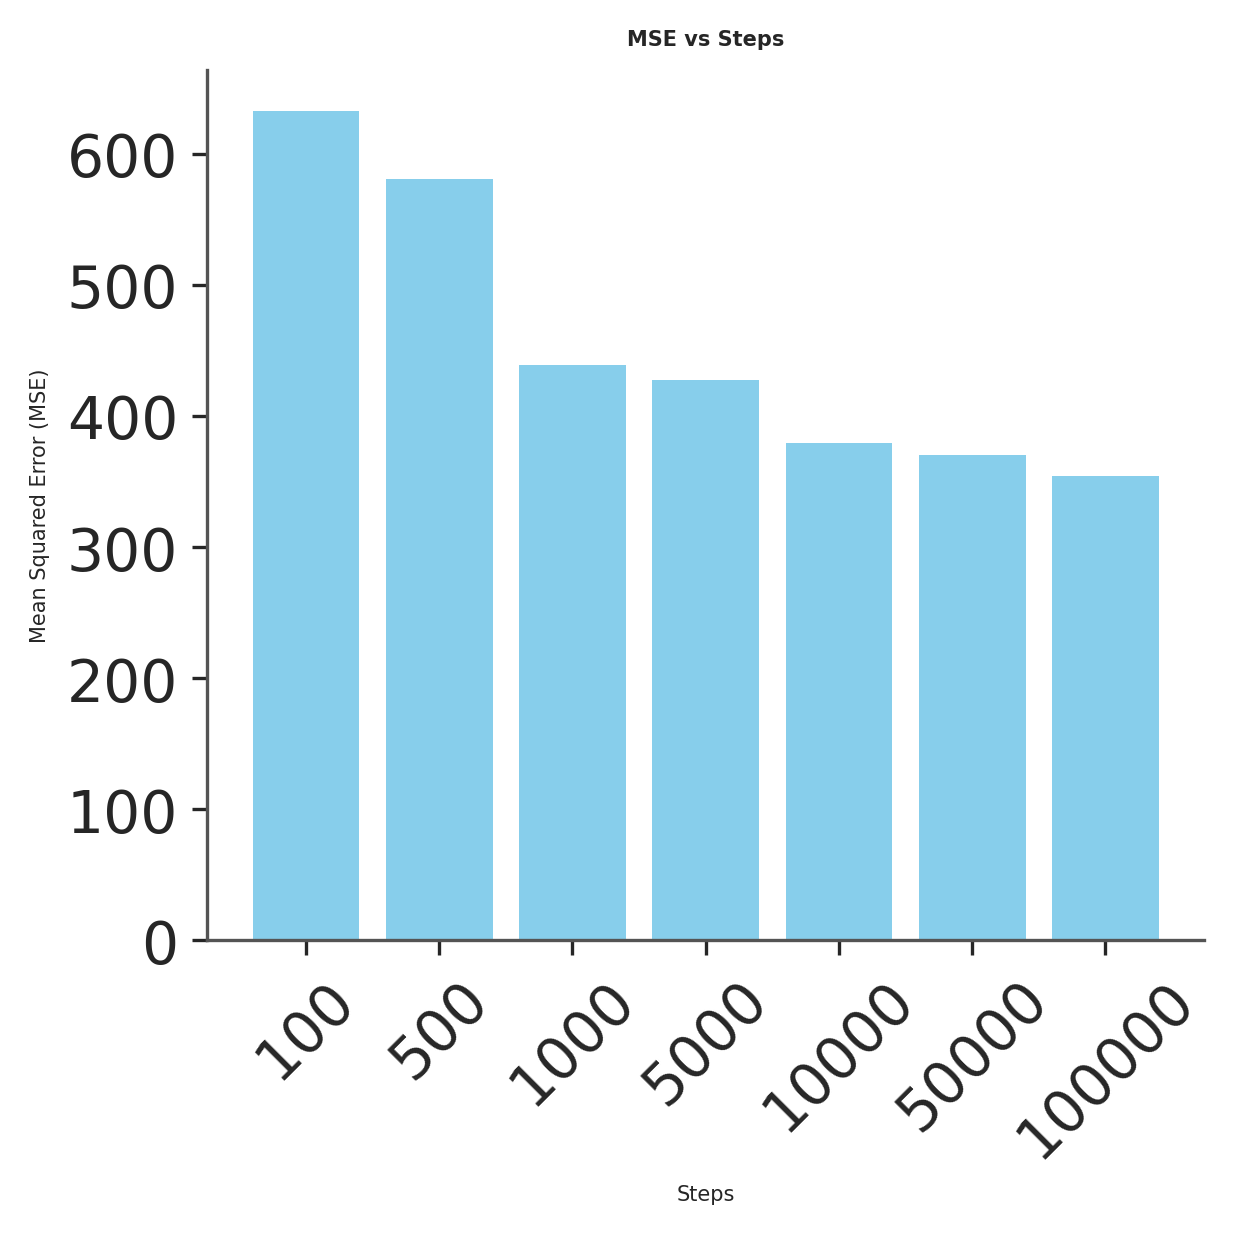

In [19]:
import matplotlib.pyplot as plt

# Data
steps = [100,500,1000, 5000, 10000, 50000, 100000]
MSE = [632.213,580.434,439.1, 427.3, 379.14,370.2332, 354.350]

plt.figure(figsize=(4, 4))

# Plotting MSE vs Steps as a bar graph
plt.bar([str(step) for step in steps], MSE, color='skyblue')

plt.xlabel('Steps',fontsize=5)
plt.ylabel('Mean Squared Error (MSE)',fontsize=5)
plt.title('MSE vs Steps',fontsize=5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


